# Análise do DataFrame STG_OPR_ITT

## Importando as bibliotecas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Configurando o tamanho padrão dos gráficos.

In [2]:
plt.rcParams['figure.figsize'] = (11,7)

## Carregando os dados necessários.

In [3]:
# DataFrame principal.
dados_STG_OPR_ITT = pd.read_excel('STG_OPR_ITT.xlsx') # DataFrame de Operações.

# DataFrame para validação (esse será usado para validar as modalidades do principal).
dados_STG_MDL = pd.read_excel('STG_MDL.xlsx') # DataFrame das Modalidades.

## Descrição inicial do DataFrame STG_OPR_ITT.

In [161]:
linhas = dados_STG_OPR_ITT.shape[0] # Pegando o total de linhas.
colunas = dados_STG_OPR_ITT.shape[1] # Pegando o total de colunas.

print('-' * 60)
print(f'O DataFrame STG_OPR_ITT tem {linhas} linhas e {colunas} colunas.')
print('-' * 60)

print('Contendo as colunas: ')
for index, coluna in enumerate(dados_STG_OPR_ITT.columns): # Pegando as colunas existentes nele.
    print(f'{index} - {coluna}') # Mostrando-as.
    
print('-' * 60)

------------------------------------------------------------
O DataFrame STG_OPR_ITT tem 891 linhas e 11 colunas.
------------------------------------------------------------
Contendo as colunas: 
0 - ID_STG_OPR_ITT
1 - VLR_CTRD_CSC
2 - QTD_PCL
3 - VLR_SDO_DDR
4 - QTD_CLI_CAD_POS
5 - QTD_OPR
6 - ID_FNT_ITT
7 - ID_MDL
8 - DES_TIP_PSS
9 - DAT_RSS_FNT_ITT
10 - DAT_INC_DBO
------------------------------------------------------------


## Repetindo o processo para o DataFrame STG_MDL.

In [162]:
linhas = dados_STG_MDL.shape[0]
colunas = dados_STG_MDL.shape[1]

print('-' * 60)
print(f'O DataFrame STG_MDL tem {linhas} linhas e {colunas} colunas.')
print('-' * 60)

print('Contendo as colunas: ')
for index, coluna in enumerate(dados_STG_MDL.columns): 
    print(f'{index} - {coluna}')
    
print('-' * 60)

------------------------------------------------------------
O DataFrame STG_MDL tem 19 linhas e 4 colunas.
------------------------------------------------------------
Contendo as colunas: 
0 - ID_STG_MDL
1 - COD_MDL
2 - DES_MDL
3 - DAT_INC_DBO
------------------------------------------------------------


## Analisando a Integridade dos dados

 __Obs:__ Análise dividida em duas partes, pois o código C01 (consórcio) precisa de um tratamento especial.
 
 __-1ª parte:__ Acontecerá __SEM__ as linhas com o código C01 e também __SEM__ as colunas 'VLR_CTRD_CSC' e 'VLR_SDO_DDR'.
 
 __-2ª parte:__ Acontecerá __SOMENTE COM__ as linhas com o código C01 e também __COM__ todas as colunas.

### Analisando SEM o código C01 (consórcio).

In [163]:
# Retirando as colunas VLR_CTRD_CSC e VLR_SDO_DDR para realizar a análise.
temp = dados_STG_OPR_ITT.drop(columns = ['VLR_CTRD_CSC', 'VLR_SDO_DDR'])

# Retirando as linhas com o ID_MDL igual a C01 (consórcio).
temp = temp[temp['ID_MDL'] != 'C01'] 
analisar = temp.notnull().count() # Contando quantos não são nulos.

total_linhas = temp.shape[0] # Pegando o total de linhas.
print('-' * 60)
print(f'Total de linhas {total_linhas}')
print('-' * 60)

# Colocando em um dicionário os nomes das colunas e seus respectivos totais de não nulos.
# Também transformando os totais em porcentagem.
situacao = {x[0] : (x[1] * 100 / total_linhas) for x in analisar.items()}

# Criando um DataFrame com as informações recolhidas.
situacao_plot = pd.DataFrame({'COMPLETUDE (%)' : [x for x in situacao.values()]},
                             index = [x for x in situacao.keys()])
situacao_plot # Mostrando-o.

------------------------------------------------------------
Total de linhas 705
------------------------------------------------------------


,COMPLETUDE (%)
ID_STG_OPR_ITT,100.0
QTD_PCL,100.0
QTD_CLI_CAD_POS,100.0
QTD_OPR,100.0
ID_FNT_ITT,100.0
ID_MDL,100.0
DES_TIP_PSS,100.0
DAT_RSS_FNT_ITT,100.0
DAT_INC_DBO,100.0


#### Criando um gráfico.

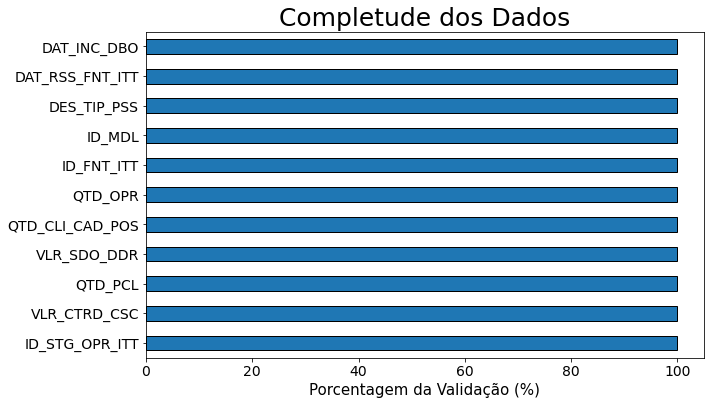

In [184]:
situacao_plot.plot(kind = 'barh', edgecolor = 'black', legend = False, fontsize = 14, figsize = (10, 6))
plt.title('Completude dos Dados', size = 25); # Adicionando um título.
plt.xlabel('Porcentagem da Validação (%)', size = 15); # Nomeando o eixo X.

### Analisando SOMENTE COM o código C01 (consórcio).

In [165]:
# Copiando o DataFrame principal.
temp = dados_STG_OPR_ITT.copy()
# Selecionando somente as linhas com o ID_MDL igual a C01 (consórcio).
temp = temp[temp['ID_MDL'] == 'C01']
analisar = temp.notnull().count() # Contando quantos não são nulos.

total_linhas = temp.shape[0] # Pegando o total de linhas.
print('-' * 60)
print(f'Total de linhas {total_linhas}')
print('-' * 60)

# Colocando em um dicionário os nomes das colunas e seus respectivos totais de não nulos.
# Também transformando os totais em porcentagem.
situacao = {x[0] : (x[1] * 100 / total_linhas) for x in analisar.items()}

# Criando um DataFrame com as informações recolhidas.
situacao_plot = pd.DataFrame({'COMPLETUDE (%)' : [x for x in situacao.values()]},
                             index = [x for x in situacao.keys()])
situacao_plot # Mostrando-o.

------------------------------------------------------------
Total de linhas 186
------------------------------------------------------------


,COMPLETUDE (%)
ID_STG_OPR_ITT,100.0
VLR_CTRD_CSC,100.0
QTD_PCL,100.0
VLR_SDO_DDR,100.0
QTD_CLI_CAD_POS,100.0
QTD_OPR,100.0
ID_FNT_ITT,100.0
ID_MDL,100.0
DES_TIP_PSS,100.0
DAT_RSS_FNT_ITT,100.0


#### Criando um gráfico

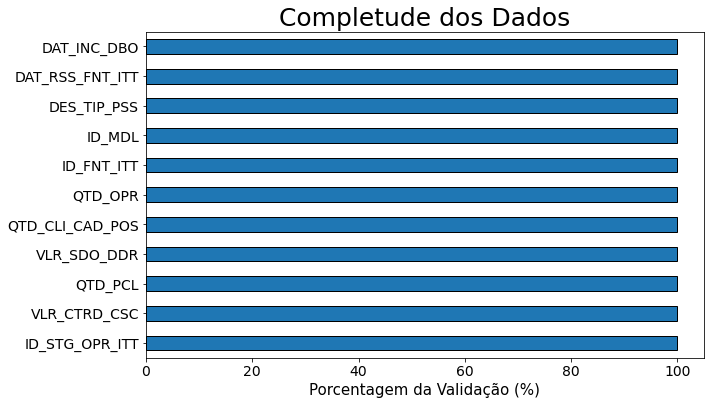

In [183]:
situacao_plot.plot(kind = 'barh', edgecolor = 'black', legend = False, fontsize = 14, figsize = (10, 6))
plt.title('Completude dos Dados', size = 25); # Adicionando um título.
plt.xlabel('Porcentagem da Validação (%)', size = 15); # Nomeando o eixo X.

## Recência dos Dados

In [167]:
analisar = dados_STG_OPR_ITT[['ID_STG_OPR_ITT', 'DAT_RSS_FNT_ITT']]
DAT_RSS_FNT_ITT = analisar.groupby('DAT_RSS_FNT_ITT').count()

analisar = dados_STG_OPR_ITT[['ID_STG_OPR_ITT', 'DAT_INC_DBO']]
DAT_INC_DBO = analisar.groupby('DAT_INC_DBO').count()

colunas = [DAT_RSS_FNT_ITT, DAT_INC_DBO]

keys = []
values = []

for coluna in colunas:
    for x in coluna['ID_STG_OPR_ITT'].to_dict().items():
        keys.append(x[0])
        values.append(x[1])
    
analise =  pd.DataFrame({'DADOS' : [x for x in keys], 
                         'OCORRÊNCIA (%)' : [x * 100 / analisar.shape[0] for x in values]}, 
                        index = ['DAT_RSS_FNT_ITT', 'DAT_INC_DBO'])

analise

,DADOS,OCORRÊNCIA (%)
DAT_RSS_FNT_ITT,2020-01-16,100.0
DAT_INC_DBO,2020-01-27 10:49:48.15,100.0


## Convertendo os valores para acrescentar dois decimais.

In [167]:
colunas = ['VLR_CTRD_CSC', 'VLR_SDO_DDR'] # Colunas a serem convertidas.

for coluna in colunas:
    print('-' * 60 + f'\nColuna: {coluna}\n')
    
    for index, antes in enumerate(dados_STG_OPR_ITT[coluna].dropna()):
        depois = antes * 0.01
        dados_STG_OPR_ITT[coluna] = dados_STG_OPR_ITT[coluna].replace(antes, depois) # Trocando o velho pelo novo.

        if index < 10: # Essa parte serve somente para limitar a amostragem dos valores.
            print(f'R${depois:>20.2f}') # Mostrando alguns exemplos.
    
    print('-' * 60)

------------------------------------------------------------
Coluna: VLR_CTRD_CSC

R$           242311.68
R$           837200.00
R$          4534094.14
R$          8318873.55
R$          1687200.00
R$           322324.54
R$          5760952.64
R$          5288794.11
R$          4953127.77
R$         67084212.43
------------------------------------------------------------
------------------------------------------------------------
Coluna: VLR_SDO_DDR

R$           147746.41
R$           611460.76
R$          3455692.91
R$          3872932.36
R$           471518.18
R$           175493.07
R$          3031500.68
R$          2470154.82
R$          2411390.67
R$         59327136.31
------------------------------------------------------------


## Validando as modalidades.

In [168]:
validar = dados_STG_OPR_ITT['ID_MDL'].unique() # Pegando somente os IDs únicos para ser validado.

print('-' * 60)
print(f'Códigos para validar: \n' + ' - '.join(validar))
print('-' * 60)

# Atribuindo os códigos existentes em uma lista para poder usar o 'in'. 
codigos_existentes = [x for x in dados_STG_MDL['COD_MDL']] 

for codigo in validar:
    print(codigo, end = ' = ')
    
    if codigo in codigos_existentes: # Verificando se o código existe nos existentes.
        print('OK')
    
    else:
        print('FAIL')
        
print('-' * 60)

------------------------------------------------------------
Códigos para validar: 
A04 - B99 - B05 - B03 - C01 - A01 - A99 - B01 - A05 - B07 - F01 - B06 - G01
------------------------------------------------------------
A04 = OK
B99 = OK
B05 = OK
B03 = OK
C01 = OK
A01 = OK
A99 = OK
B01 = OK
A05 = OK
B07 = OK
F01 = OK
B06 = OK
G01 = OK
------------------------------------------------------------


## Adicionando uma nova coluna (MDL_DESCRICAO) ao DataFrame principal.

### Primeiramente criando um dicionário com o código e sua respectiva descrição para facilitar o processo.

In [169]:
new = dados_STG_MDL[['COD_MDL', 'DES_MDL']] # Escolhendo as colunas necessárias.
dictionary = new.set_index('COD_MDL').T.to_dict('list') # Convertendo em um dicionário (valores em lista).

for key, value in dictionary.items():
    dictionary[key] = str(value).strip("['']") # Convertendo os valores (em lista) para string.
    
dictionary # Mostrando o dicionário final.

{'E02': 'ADIANTAMENTO DEPOSITANTE',
 'B99': 'OUTROS FINANCIAMENTOS',
 'D01': 'CARTAO DE CREDITO',
 'G01': 'TITULOS DESCONTADOS',
 'A02': 'EMPRESTIMO - CAPITAL DE GIRO',
 'A04': 'EMPRESTIMO - CREDITO PESSOAL',
 'E01': 'CHEQUE ESPECIAL E CONTA GARANTIDA',
 'B03': 'FINANCIAMENTO - IMOBILIARIOS SFH',
 'B02': 'FINANCIAMENTO - IMPORTACAO  E EXPORTACAO',
 'A05': 'EMPRESTIMO - MICROCREDITO',
 'B04': 'FINANCIAMENTO - MICROCREDITO',
 'B07': 'FINANCIAMENTO - ARREENDAMENTO',
 'F01': 'AVAIS E FIANCASA HONRADOS',
 'B06': 'FINANCIAMENTO - IMOBILIARIO (OUTROS)',
 'C01': 'CONSORCIO',
 'A01': 'EMPRESTIMO - CONSIGNADO',
 'B05': 'FINANCIAMENTO - AQUISICAO DE BENS (VEICULOS)',
 'A99': 'OUTROS EMPRESTIMOS',
 'B01': 'FINANCIAMENTO - RURAL E AGROINDUSTRIAL'}

### Linha por linha atribuindo ao respectivo código a sua descrição.

In [170]:
dados_STG_OPR_ITT['MDL_DESCRICAO'] = [dictionary[resp] for resp in dados_STG_OPR_ITT['ID_MDL']]
dados_STG_OPR_ITT[['ID_MDL', 'MDL_DESCRICAO']].head()

,ID_MDL,MDL_DESCRICAO
0,A04,EMPRESTIMO - CREDITO PESSOAL
1,B99,OUTROS FINANCIAMENTOS
2,B05,FINANCIAMENTO - AQUISICAO DE BENS (VEICULOS)
3,B03,FINANCIAMENTO - IMOBILIARIOS SFH
4,B03,FINANCIAMENTO - IMOBILIARIOS SFH


## Analisando o total de operações por modalidades.

In [171]:
analisar = dados_STG_OPR_ITT[['MDL_DESCRICAO', 'ID_STG_OPR_ITT']]

mdl_mais_usadas = analisar.groupby('MDL_DESCRICAO').count().sort_values(by = 'ID_STG_OPR_ITT', ascending = False)
mdl_mais_usadas

,ID_STG_OPR_ITT
MDL_DESCRICAO,
FINANCIAMENTO - IMOBILIARIOS SFH,214
CONSORCIO,186
EMPRESTIMO - CONSIGNADO,122
EMPRESTIMO - CREDITO PESSOAL,112
OUTROS FINANCIAMENTOS,104
FINANCIAMENTO - AQUISICAO DE BENS (VEICULOS),71
OUTROS EMPRESTIMOS,35
EMPRESTIMO - MICROCREDITO,20
FINANCIAMENTO - RURAL E AGROINDUSTRIAL,19


### Criando um gráfico.

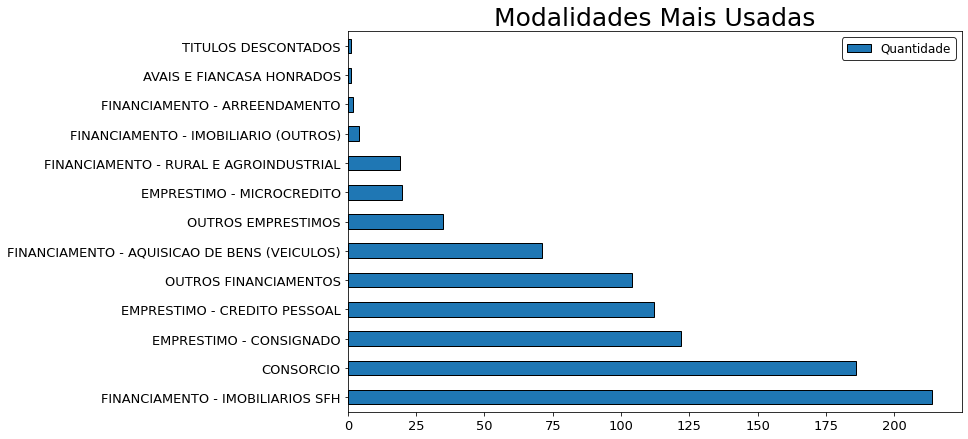

In [172]:
mdl_mais_usadas.plot(kind = 'barh', edgecolor='black', fontsize = 13)
plt.title("Modalidades Mais Usadas", size=25); # Adicionando um título.
plt.xlabel('', size=15); # Nomeando o eixo X.
plt.ylabel('', size=15); # Nomeando o eixo Y.
plt.legend(['Quantidade'], fontsize = 'large', edgecolor = 'black') # Configurando a legenda.

## Analisando a soma das operações por modalidades.

In [173]:
analisar = dados_STG_OPR_ITT[['MDL_DESCRICAO', 'QTD_OPR']].dropna()

soma_opr_por_mdl = analisar.groupby('MDL_DESCRICAO').sum().sort_values(by = 'QTD_OPR', ascending = False)
soma_opr_por_mdl

,QTD_OPR
MDL_DESCRICAO,
EMPRESTIMO - CREDITO PESSOAL,411896
EMPRESTIMO - CONSIGNADO,181711
OUTROS FINANCIAMENTOS,115480
FINANCIAMENTO - AQUISICAO DE BENS (VEICULOS),30366
OUTROS EMPRESTIMOS,15067
CONSORCIO,12509
TITULOS DESCONTADOS,11850
FINANCIAMENTO - IMOBILIARIOS SFH,4331
EMPRESTIMO - MICROCREDITO,1482


### Criando um gráfico.

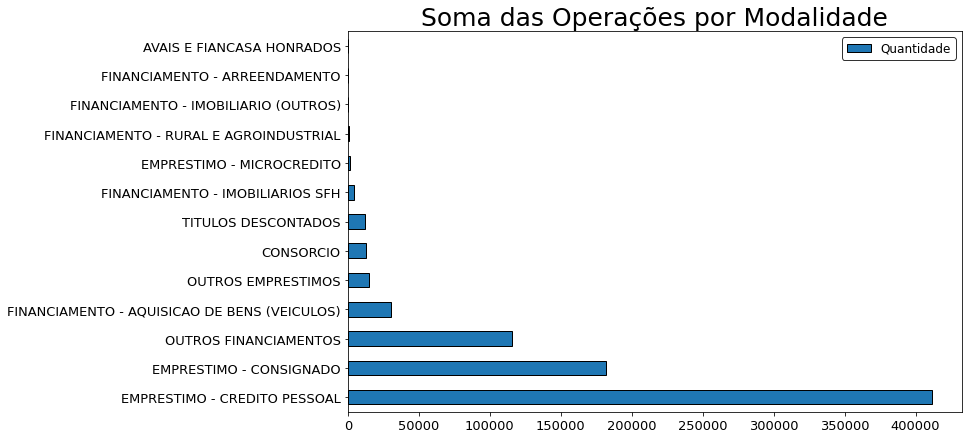

In [179]:
soma_opr_por_mdl.plot(kind = 'barh', edgecolor='black', fontsize = 13)
plt.title("Soma das Operações por Modalidade", size=25); # Adicionando um título.
plt.xlabel('', size=15); # Nomeando o eixo X.
plt.ylabel('', size=15); # Nomeando o eixo Y.
plt.legend(['Quantidade'], fontsize = 'large', edgecolor = 'black') # Configurando a legenda.

## Analisando a soma das parcelas por modalidades.

In [175]:
analisar = dados_STG_OPR_ITT[['MDL_DESCRICAO', 'QTD_PCL']].dropna()

soma_parcela_por_mdl = analisar.groupby('MDL_DESCRICAO').sum().sort_values(by = 'QTD_PCL', ascending = False)
soma_parcela_por_mdl

,QTD_PCL
MDL_DESCRICAO,
FINANCIAMENTO - IMOBILIARIOS SFH,49467
CONSORCIO,20139
EMPRESTIMO - CONSIGNADO,7563
EMPRESTIMO - CREDITO PESSOAL,7447
OUTROS FINANCIAMENTOS,5522
FINANCIAMENTO - AQUISICAO DE BENS (VEICULOS),2583
OUTROS EMPRESTIMOS,630
EMPRESTIMO - MICROCREDITO,287
FINANCIAMENTO - RURAL E AGROINDUSTRIAL,230


### Criando um gráfico.

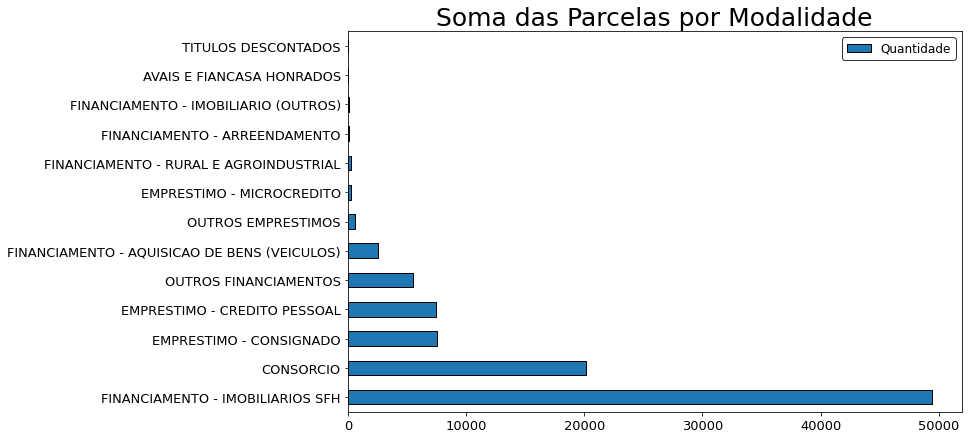

In [180]:
soma_parcela_por_mdl.plot(kind = 'barh', edgecolor='black', fontsize = 13)
plt.title("Soma das Parcelas por Modalidade", size=25); # Adicionando um título.
plt.xlabel('', size=15); # Nomeando o eixo X.
plt.ylabel('', size=15); # Nomeando o eixo Y.
plt.legend(['Quantidade'], fontsize = 'large', edgecolor = 'black') # Configurando a legenda.

## Adicionando uma nova coluna (VLR_PAGO) ao DataFrame temporário.

### Primeiramente criando uma lista com o resultado da subtração.

In [177]:
# Selecionando somente as linhas com o ID_MDL igual a C01 (consórcio).
analisar = dados_STG_OPR_ITT[dados_STG_OPR_ITT['ID_MDL'] == 'C01'] 
analisar = analisar[['VLR_CTRD_CSC', 'VLR_SDO_DDR']] # Selecionando somente as colunas necessárias.

total = [] # Lista temporária.

for index in analisar.index: # Efeituando a conta e jogando o resultado na lista.
    total.append(round(analisar['VLR_CTRD_CSC'][index] - analisar['VLR_SDO_DDR'][index], 2))

    
analisar['VLR_PAGO'] = total # Adicionando a lista.
analisar.head(10) 

,VLR_CTRD_CSC,VLR_SDO_DDR,VLR_PAGO
6,242311.68,147746.41,94565.27
14,837200.00,611460.76,225739.24
18,4534094.14,3455692.91,1078401.23
19,8318873.55,3872932.36,4445941.19
22,1687200.00,471518.18,1215681.82
31,322324.54,175493.07,146831.47
34,5760952.64,3031500.68,2729451.96
37,5288794.11,2470154.82,2818639.29
38,4953127.77,2411390.67,2541737.10
43,67084212.43,59327136.31,7757076.12


In [178]:
analisar = dados_STG_OPR_ITT[['VLR_CTRD_CSC', 'VLR_SDO_DDR']] # Colunas necessárias.

total = [] # Lista temporária.

for index in range(analisar.shape[0]): # Efeituando a conta e jogando o resultado na lista.
    total.append(round(analisar['VLR_CTRD_CSC'][index] - analisar['VLR_SDO_DDR'][index], 2))

    
analisar['VLR_PAGO'] = total # Adicionando a lista.
analisar.dropna().head(10) 

/home/fatality/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,VLR_CTRD_CSC,VLR_SDO_DDR,VLR_PAGO
6,242311.68,147746.41,94565.27
14,837200.00,611460.76,225739.24
18,4534094.14,3455692.91,1078401.23
19,8318873.55,3872932.36,4445941.19
22,1687200.00,471518.18,1215681.82
31,322324.54,175493.07,146831.47
34,5760952.64,3031500.68,2729451.96
37,5288794.11,2470154.82,2818639.29
38,4953127.77,2411390.67,2541737.10
43,67084212.43,59327136.31,7757076.12
